In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [8]:
dataset_dir = "dataset"

dir_list = os.listdir(dataset_dir)
print("Files and directories in '", dataset_dir, "' :")
# prints all files
print(dir_list)

Files and directories in ' dataset ' :
['Dataset for Fetus Framework', 'ObjectDetection.xlsx']


In [9]:
metadata_path = '/ObjectDetection.xlsx'
df_metadata = pd.read_excel(dataset_dir + metadata_path)

# Convert h_min, w_min, h_max, w_max to integers
for col in ['h_min', 'w_min', 'h_max', 'w_max']:
    df_metadata[col] = df_metadata[col].astype(int)

display(df_metadata)

,fname,structure,h_min,w_min,h_max,w_max
0,168.png,thalami,178,171,244,261
1,168.png,nasal bone,96,308,111,349
2,168.png,palate,133,300,205,408
3,168.png,nasal skin,86,324,95,349
4,168.png,nasal tip,79,345,89,376
...,...,...,...,...,...,...
9428,1577.png,nasal tip,134,363,142,385
9429,1577.png,NT,354,240,374,392
9430,1577.png,palate,169,317,219,407
9431,1577.png,thalami,192,217,244,281


In [10]:
n_unique_files = df_metadata['fname'].nunique()
print(f"Number of unique files: {n_unique_files}")

print(f"Directories: {os.listdir(os.path.join(dataset_dir, 'Dataset for Fetus Framework'))}")

Number of unique files: 1131
Directories: ['External Test Set', 'Internal Test Set', 'Set1-Training&Validation Sets CNN', 'Set2-Training&Validation Sets ANN Scoring system']


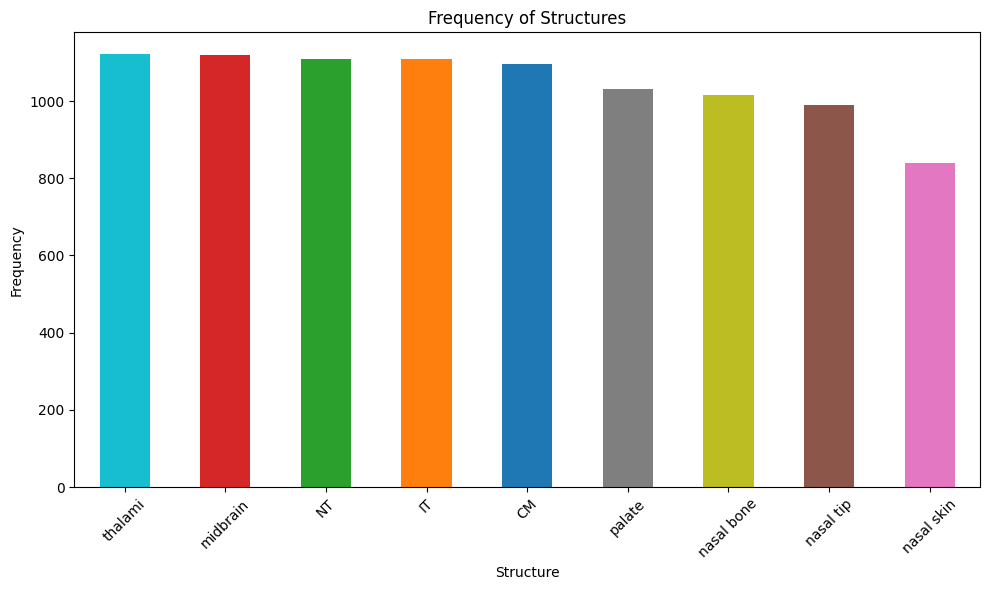

In [11]:
# Define a color for each unique structure by cycling through a qualitative colormap
unique_structures = df_metadata['structure'].unique()
unique_structures = unique_structures[::-1]
colors = plt.get_cmap('tab10', len(unique_structures))
color_map = {structure: colors(i) for i, structure in enumerate(unique_structures)}

# bar chart with frequencies of each structure using the colots
structure_counts = df_metadata['structure'].value_counts()
plt.figure(figsize=(10, 6))
structure_counts.plot(kind='bar', color=[color_map[structure] for structure in structure_counts.index])
plt.title('Frequency of Structures')
plt.xlabel('Structure')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
training_set_dir = "training_set"
if not os.path.exists(training_set_dir):
    os.makedirs(training_set_dir)

Image: 188.png, size: (449, 719, 3)


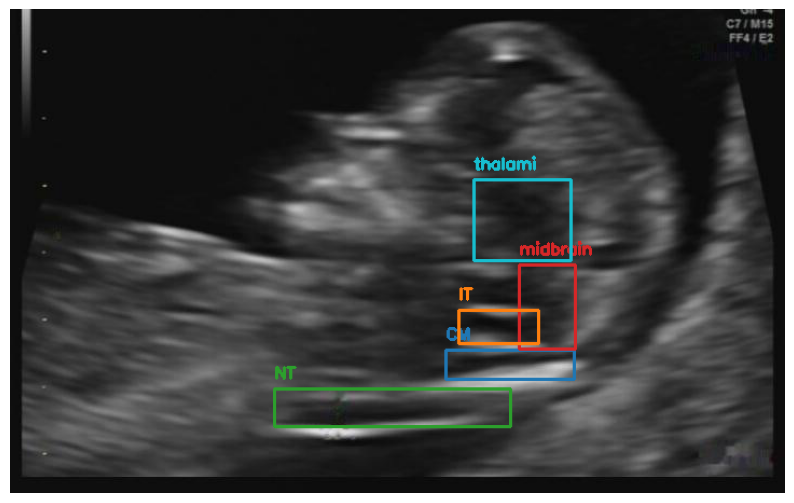

Image: 278.png, size: (497, 677, 3)


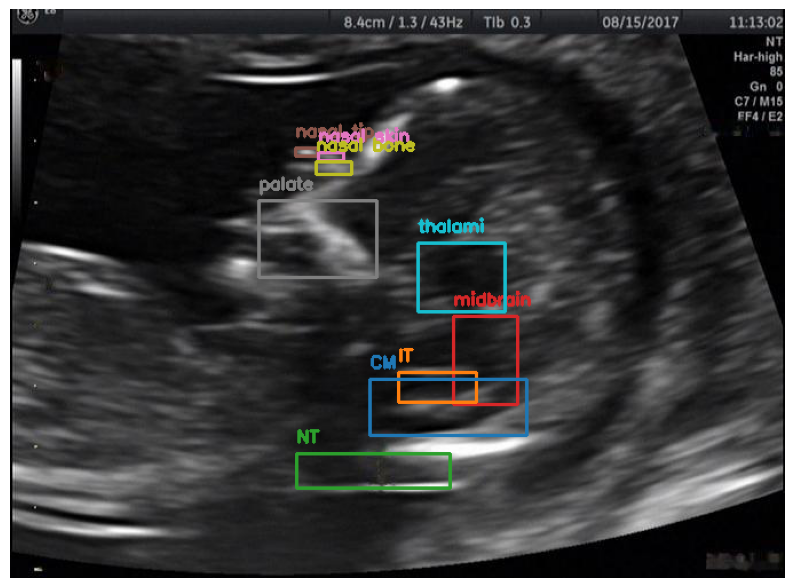

Image: 368.png, size: (511, 719, 3)


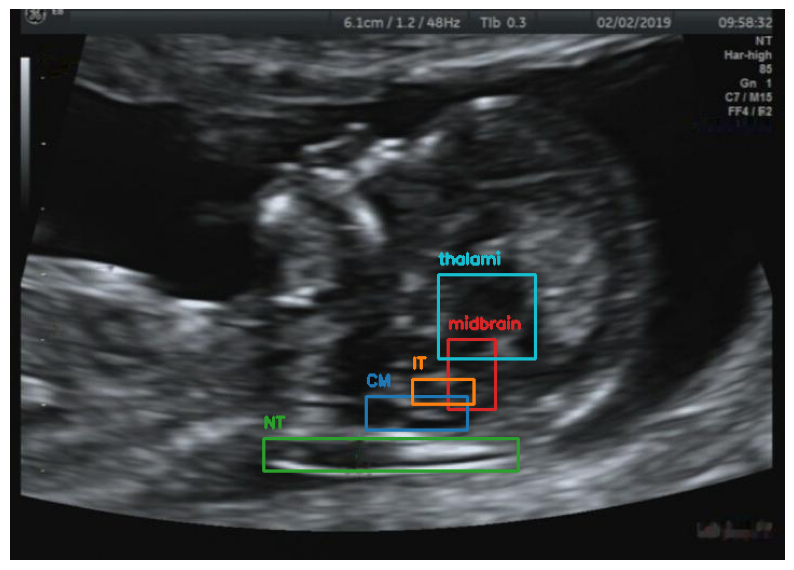

Image: 458.png, size: (415, 673, 3)


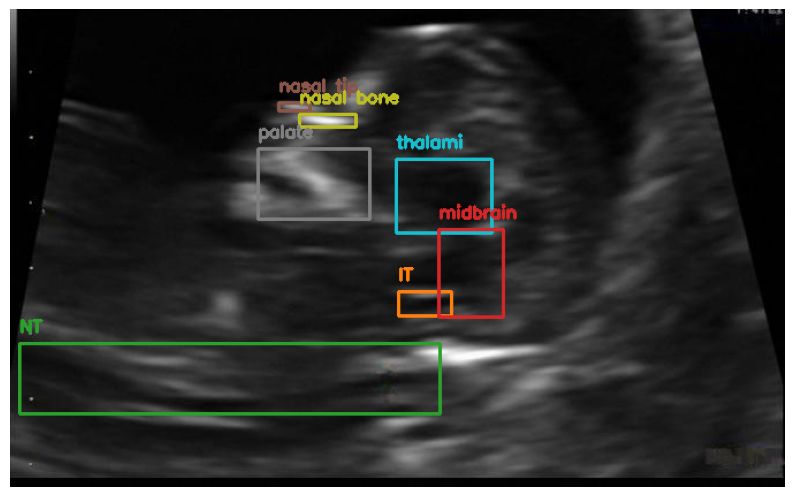

Image: 548.png, size: (495, 726, 3)


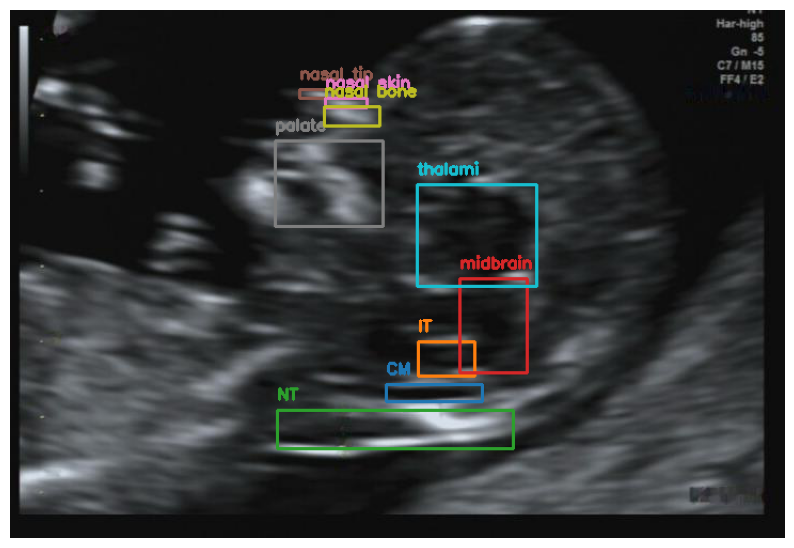

Image: 638.png, size: (450, 640, 3)


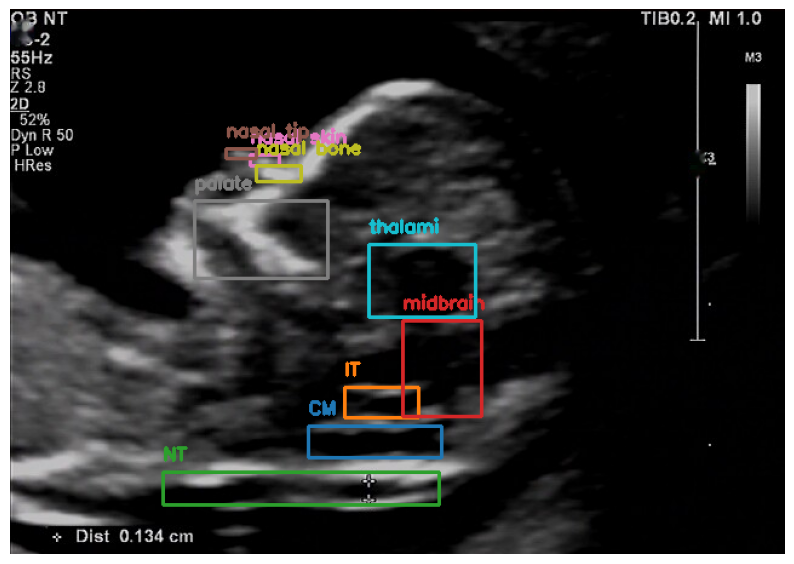

Image: 728.png, size: (450, 640, 3)


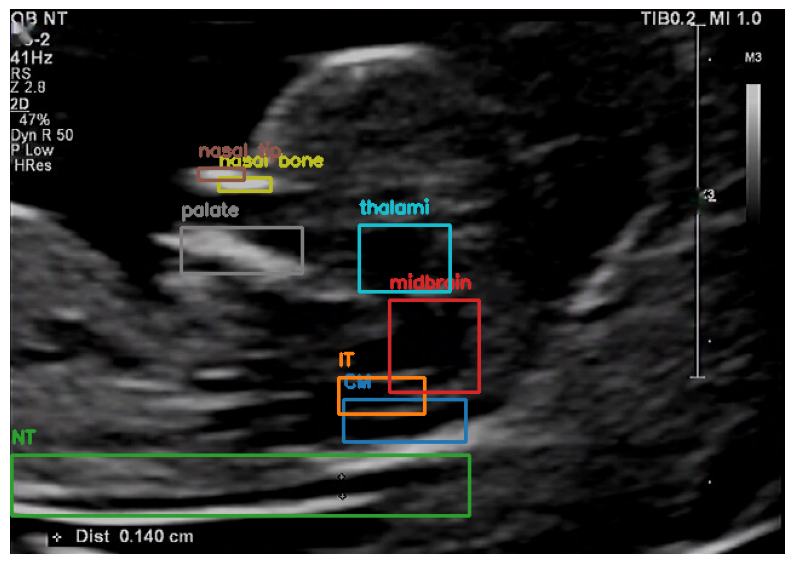

Image: 88.png, size: (450, 640, 3)


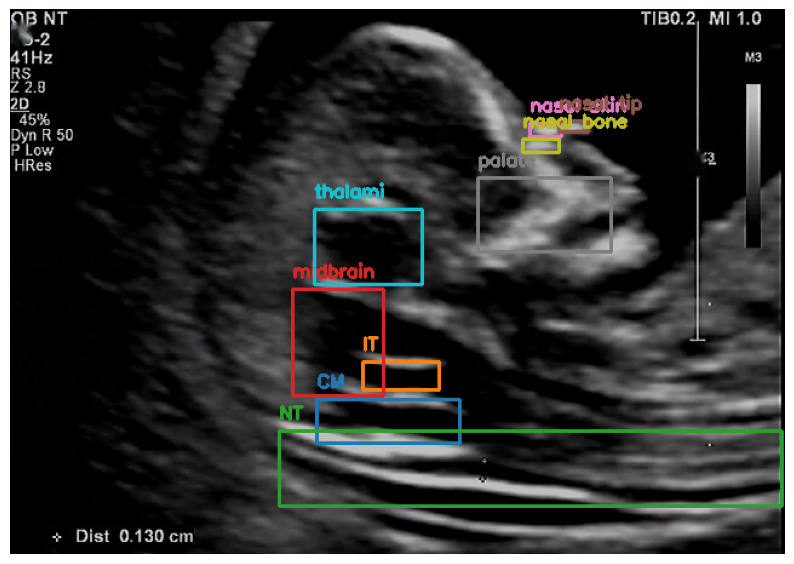

Image: 838.png, size: (474, 681, 3)


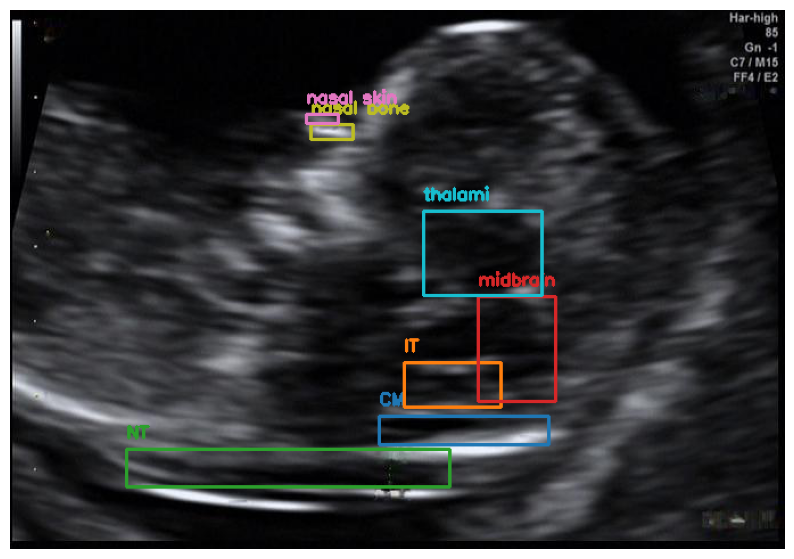

Image: 938.png, size: (495, 681, 3)


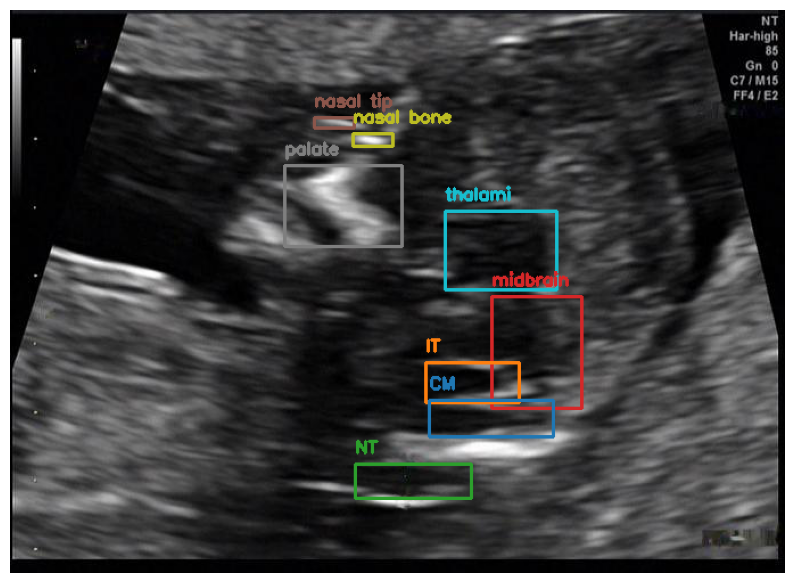

Total images processed: 1061


In [ ]:
# Loop through images in the dataset, get the coordinates from the metadata, and draw rectangles
seen_ids = []
count = 0

for root, _, files in os.walk(dataset_dir):
	lower_root = root.lower()
	if 'test' in lower_root or 'non' in lower_root:
		continue
	for img in files:
		if img.endswith('.png'):
			# Check if the image has already been processed
			if img in seen_ids:
				continue
			seen_ids.append(img)
			count += 1

			# Read the image
			image_path = os.path.join(root, img)
			image = cv2.imread(image_path)

			# Get the metadata for the current image
			metadata = df_metadata[df_metadata['fname'] == img]

			# store a copy of the original image in "dataset/Training set"
			original_image_path = os.path.join(training_set_dir, img)
			cv2.imwrite(original_image_path, image)
			
			# Skip using count
			if count % 100 != 0:
				continue

			# Draw rectangles for each row in the metadata
			if not metadata.empty:  # Check if metadata is not empty
				for index, row in metadata.iterrows():
					x_min = row['w_min']
					y_min = row['h_min']
					x_max = row['w_max']
					y_max = row['h_max']

					# Convert RGBA to BGR and scale to 0-255
					rgba_color = color_map[row['structure']]
					bgr_color = tuple(int(c * 255) for c in rgba_color[:3][::-1])  # Reverse RGB to BGR

					# Draw rectangle on the image
					cv2.rectangle(image, (x_min, y_min), (x_max, y_max), bgr_color, 2)

					# Label the rectangle with the structure name
					label = row['structure']
					cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, bgr_color, 2)
			else:
				print(f"No metadata found for image: {img}")

			# Display the image with rectangles
			print(f"Image: {img}, size: {image.shape}")
			plt.figure(figsize=(10, 10))
			plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
			plt.axis('off')
			plt.show()



print(f"Total images processed: {count}")